<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

# Model 5

* 6 layers
* (239, 252, 265, 178, 91, 4) units, he_normal, relu
* BatchNormalization
* Adam(0.001)
* epochs 100
* batch_size 500
<br><br>
* batch_size를 증가시켰더니 오히려 성능이 향상

In [5]:
# 케라스를 통해 모델 생성을 시작합니다.

model_05 = Sequential()
model_05.add(Dense(units= 239, input_dim=226, kernel_initializer='he_normal'))
model_05.add(BatchNormalization())
model_05.add(Activation('relu'))
model_05.add(Dense(units=252, kernel_initializer='he_normal'))
model_05.add(BatchNormalization())
model_05.add(Activation('relu'))
model_05.add(Dense(units=265, kernel_initializer='he_normal'))
model_05.add(BatchNormalization())
model_05.add(Activation('relu'))
model_05.add(Dense(units=178, kernel_initializer='he_normal'))
model_05.add(BatchNormalization())
model_05.add(Activation('relu'))
model_05.add(Dense(units=91, kernel_initializer='he_normal'))
model_05.add(BatchNormalization())
model_05.add(Activation('relu'))
model_05.add(Dense(units=4, activation='linear'))

adam = keras.optimizers.Adam(0.001)
model_05.compile(loss='mae', optimizer=adam, metrics=['mae'])

hist = model_05.fit(train_X, train_Y, epochs=100, batch_size=500, validation_split=0.05)










Train on 769500 samples, validate on 40500 samples
Epoch 1/100





769500/769500 [==============================] - 36s 47us/step - loss: 79.1293 - mean_absolute_error: 79.1293 - val_loss: 49.5087 - val_mean_absolute_error: 49.5087
Epoch 2/100
769500/769500 [==============================] - 24s 31us/step - loss: 22.2881 - mean_absolute_error: 22.2881 - val_loss: 33.5192 - val_mean_absolute_error: 33.5192
Epoch 3/100
769500/769500 [==============================] - 24s 32us/step - loss: 15.1265 - mean_absolute_error: 15.1265 - val_loss: 27.5035 - val_mean_absolute_error: 27.5035
Epoch 4/100
769500/769500 [==============================] - 24s 31us/step - loss: 12.7038 - mean_absolute_error: 12.7038 - val_loss: 27.2539 - val_mean_absolute_error: 27.2539
Epoch 5/100
769500/769500 [==============================] - 24s 31us/step - loss: 11.2721 - mean_absolute_error: 11.2721 - val_loss: 26.2443 - val_mean_absolute_error: 26.2443
Epoch 6/100
769500/769500 [=======================

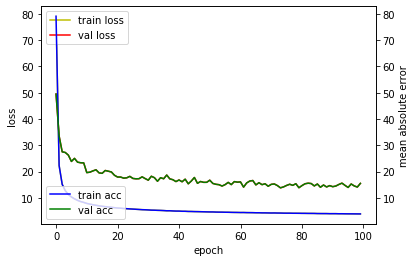

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train acc')
acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test_05 = model_05.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test_05
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_05.csv')